In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#importing train csv file
data_train=pd.read_csv(r'C:\Users\satvi\OneDrive\Desktop\bigdatamart_Train.csv')
#importing test file
data_test=pd.read_csv(r'C:\Users\satvi\OneDrive\Desktop\bigdatamart_Test.csv')
                 

In [3]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


from the data set we can understand that 1st column tells about the item id,2nd one tells about the weight of the item,3rd column tell about the fat content in the item which is of categorical data,4th column tell about the Area where all the products of particular item stored at a place,5th column tells about the type of product,6th column gives the information about price of the product,7th column tell about the store ID,8th column tell about the year of establish of the store,9th column tells about the size of the store of categorical type,10th column tells about where actual the store located among the 10 cities,11th column tell about the type of the store and last column gives information about the sales which we need to predict for the test data

In [4]:
#checking for the shape of the data
print(data_train.shape)

(8523, 12)


In [5]:
#checking for null values using isnull method
data_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

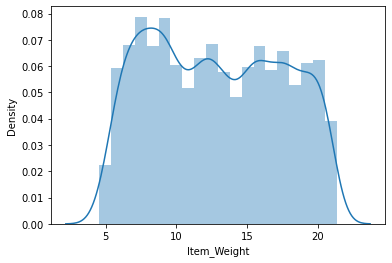

In [6]:
#checking for distplot to fill the nan values
sns.distplot(data_train['Item_Weight'])

seems to be like normal distribution so by using mean method we fill the values

In [7]:
#filling the missing column using mean method
data_train['Item_Weight']=data_train['Item_Weight'].fillna(data_train['Item_Weight'].mean())

In [8]:
#filling the missing column with mode method 
data_train['Outlet_Size']=data_train['Outlet_Size'].fillna(data_train['Outlet_Size'].mode()[0])

In [9]:
#again checking for the isnull method for train data
data_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
#checking for info()
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


The data types from info method seems to be correct for all the columns in the dataset

In [11]:
#lets check for describe method
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


from the describe method we can know that the average weight of the product is 12,the standard deviation is 4 the data looks normal for the item_weight column,the data for item_visibility also looks decent,for other columns also the data looks normal but in the sales are some up and downs but no need to worry about the sales since that we are going to predict

In [12]:
#checking unique values in dataset
data_train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [13]:
#checking for the categorical variables
cat_col=[]
for x in data_train.dtypes.index:
    if data_train.dtypes[x]=='object':
        cat_col.append(x)
print(cat_col)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


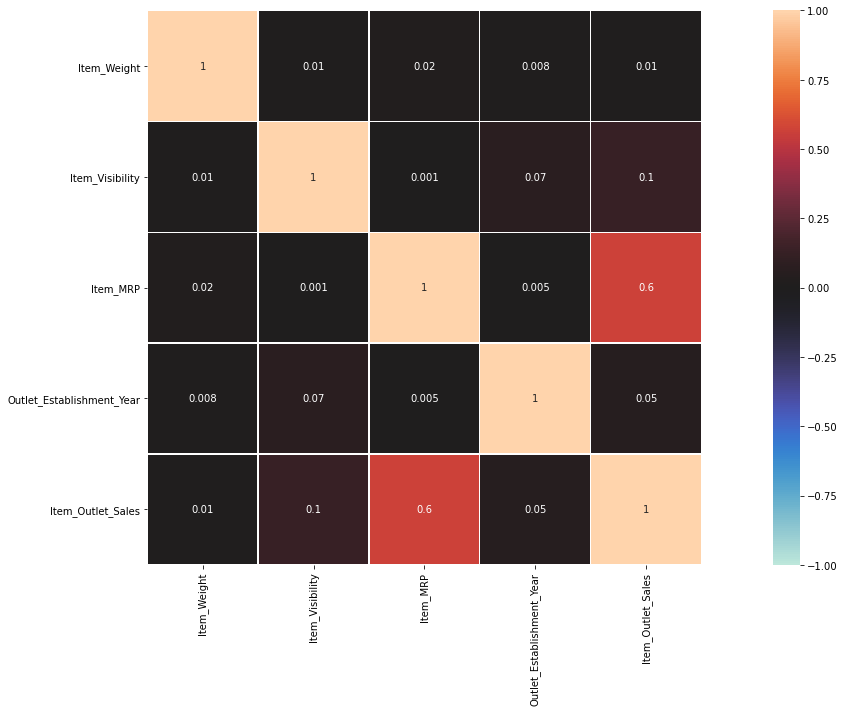

In [14]:
#lets plot the heat map to find the corelation
df_corr=data_train.corr().abs()
plt.figure(figsize=(20,10))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=.2)
plt.tight_layout()

From heat map we can say that there is no much corelation between one feature with the other feature ,but with label the highest corelated column is item_mrp of 60% where low corleated with item_weight

As per my analysis I feel some of the features are not required for the increase of the sales like item_id,item_visibility(area alloted for the products to be stored) may be there will be little contiribution but not more so i want to drop that column too and store Id that is also not required beacause we may get online when we search so lets gohead and delete all the columns which r mentioned

In [15]:
#Dropping the columns
data_train=data_train.drop(['Item_Identifier','Item_Visibility','Outlet_Identifier'],axis=1)

I feel remaining all the other features will help me in predicting the sales let me explain about the features item_weight some customers they prefer to take products based on the weight because in their family the size of the members may be less or more based on them they count the product on weight,item_fat that also everyone sees beacuse in this the persons health comes into picture may be that patient may be a patient or non patient but they concern about the health so sales also depends on that if it is of low fat they buy the product so for this instead of explaining in this lets plot the graphs for all the features v/s label and lets check

In [16]:
#creating small values for the establishment of the year
data_train['Outlet_Years']=2013-data_train['Outlet_Establishment_Year']
data_train['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

We are reducing the year of the establishment to the lesser values using, the data scientists when they have collected the data that year minus the establishment year so that we get good results on the basis of smalling the year

In [17]:
#Now we are droipping the Outlet_Establishment_Year beacuse we have got the new column
data_train.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

In [18]:
#let me convert the string data to continous data using label encoder
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
item=lab_enc.fit_transform(data_train['Item_Type'])
item

array([ 4, 14, 10, ...,  8, 13, 14])

In [19]:
pd.Series(item)

0        4
1       14
2       10
3        6
4        9
        ..
8518    13
8519     0
8520     8
8521    13
8522    14
Length: 8523, dtype: int32

In [20]:
data_train['Item_Type']=item

In [21]:
#let me convert the string data to continous data using label encoder
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
type=lab_enc.fit_transform(data_train['Outlet_Type'])
type

array([1, 2, 1, ..., 1, 2, 1])

In [22]:
pd.Series(type)

0       1
1       2
2       1
3       0
4       1
       ..
8518    1
8519    1
8520    1
8521    2
8522    1
Length: 8523, dtype: int32

In [23]:
data_train['Outlet_Type']=type

In [24]:
#let me convert the string data to continous data using label encoder
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
item_fat=lab_enc.fit_transform(data_train['Item_Fat_Content'])
item_fat

array([1, 2, 1, ..., 1, 2, 1])

In [25]:
pd.Series(item_fat)

0       1
1       2
2       1
3       2
4       1
       ..
8518    1
8519    2
8520    1
8521    2
8522    1
Length: 8523, dtype: int32

In [26]:
data_train['Item_Fat_Content']=item_fat

In [27]:
data_train['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [28]:
#let me convert the string data to continous data using ordinal encoder
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
outlet=lab_enc.fit_transform(data_train['Outlet_Size'])
outlet

array([1, 1, 1, ..., 2, 1, 2])

In [29]:
pd.Series(outlet)

0       1
1       1
2       1
3       1
4       0
       ..
8518    0
8519    1
8520    2
8521    1
8522    2
Length: 8523, dtype: int32

In [30]:
data_train['Outlet_Size']=outlet

In [31]:
#let me convert the string data to continous data using ordinal encoder
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
outlet_location=lab_enc.fit_transform(data_train['Outlet_Location_Type'])
outlet_location

array([0, 2, 0, ..., 1, 2, 0])

In [32]:
pd.Series(outlet_location)

0       0
1       2
2       0
3       2
4       2
       ..
8518    2
8519    1
8520    1
8521    2
8522    0
Length: 8523, dtype: int32

In [33]:
data_train['Outlet_Location_Type']=outlet_location

In [34]:
data_train

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,9.300,1,4,249.8092,1,0,1,3735.1380,14
1,5.920,2,14,48.2692,1,2,2,443.4228,4
2,17.500,1,10,141.6180,1,0,1,2097.2700,14
3,19.200,2,6,182.0950,1,2,0,732.3800,15
4,8.930,1,9,53.8614,0,2,1,994.7052,26
...,...,...,...,...,...,...,...,...,...
8518,6.865,1,13,214.5218,0,2,1,2778.3834,26
8519,8.380,2,0,108.1570,1,1,1,549.2850,11
8520,10.600,1,8,85.1224,2,1,1,1193.1136,9
8521,7.210,2,13,103.1332,1,2,2,1845.5976,4


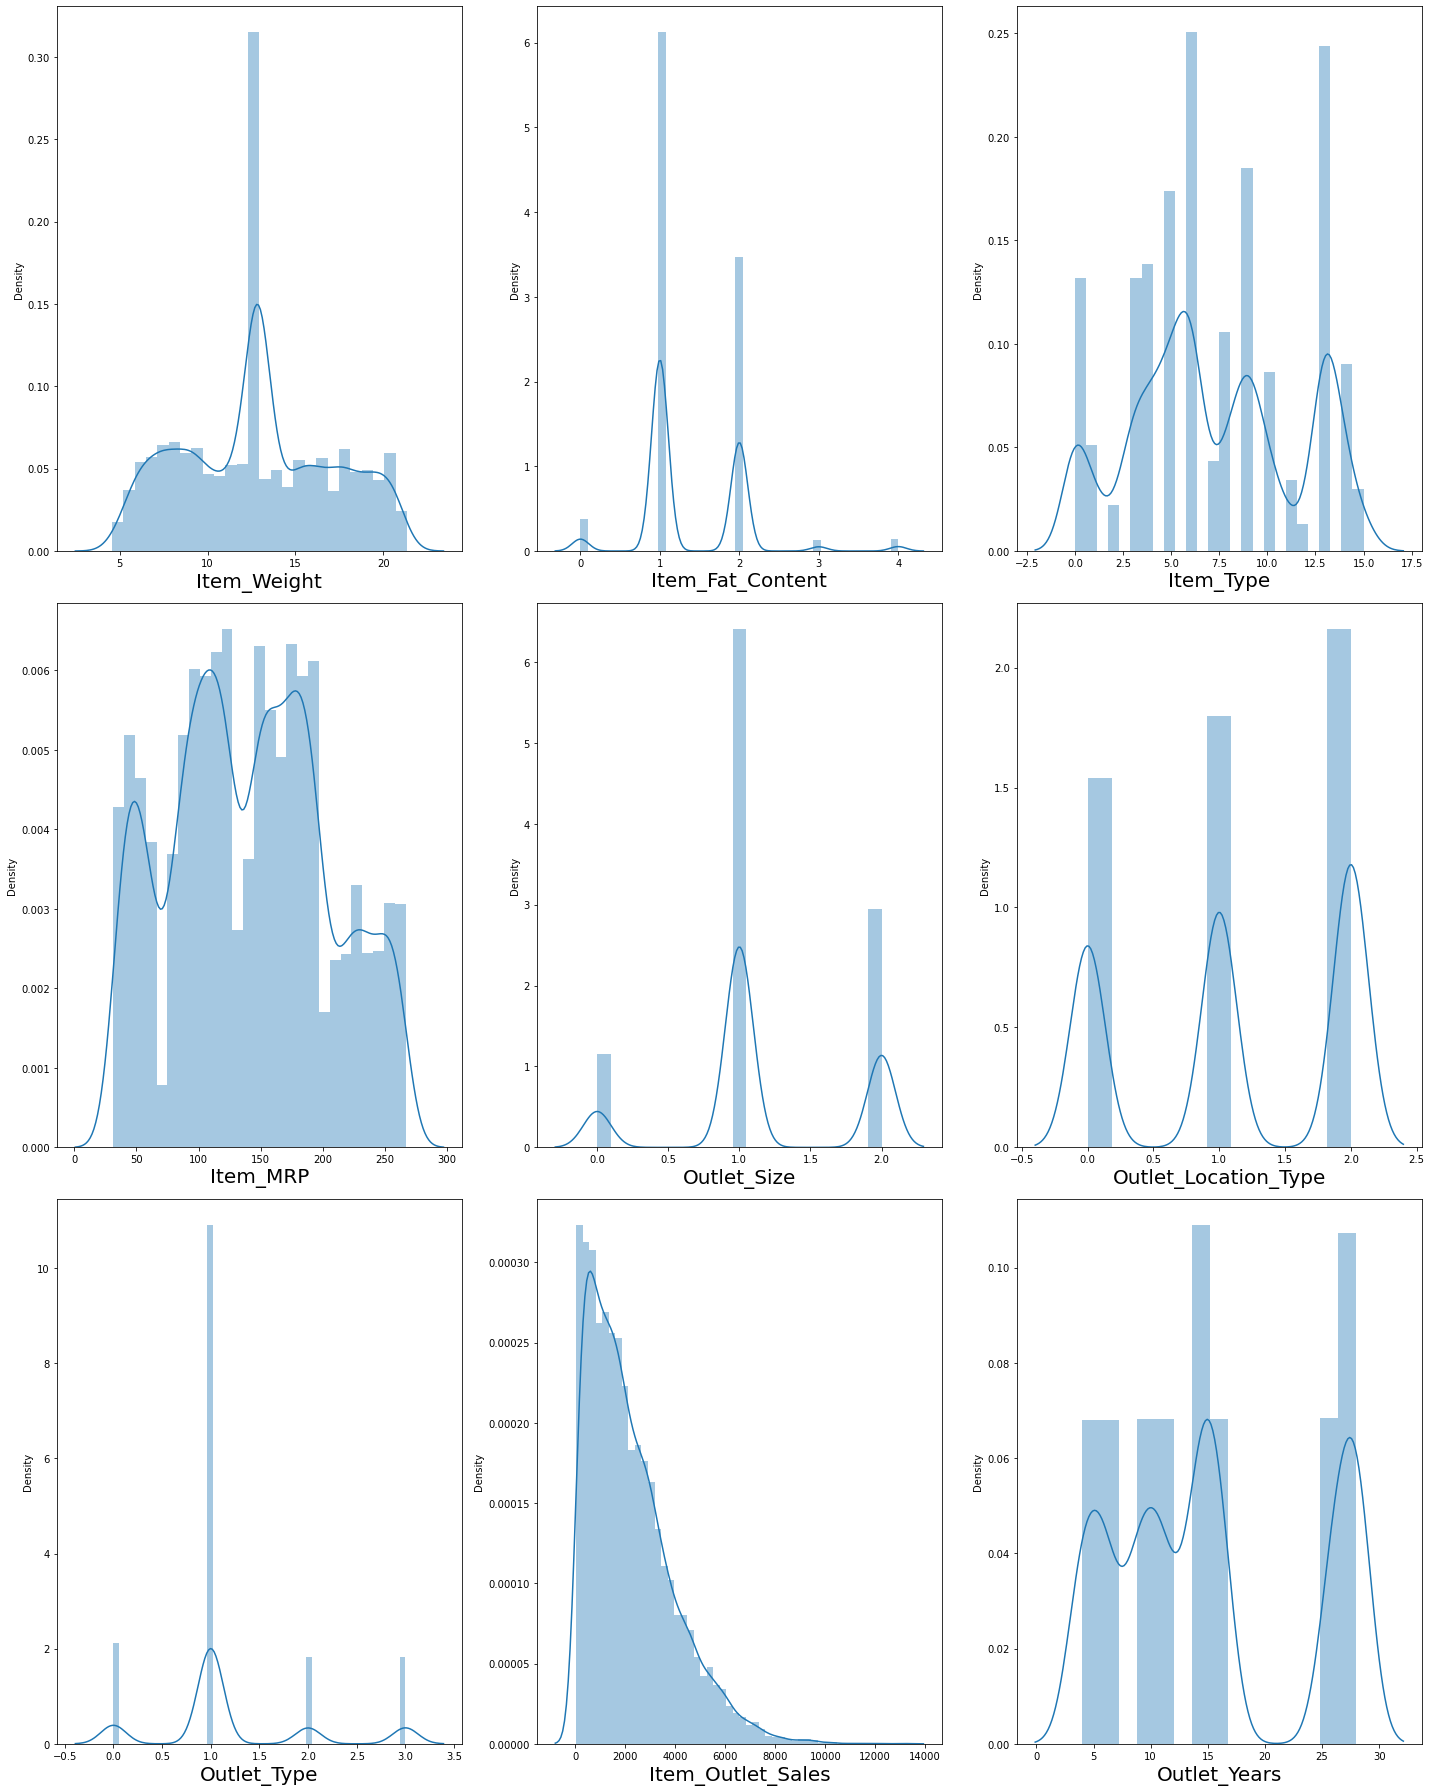

In [35]:
#lets plot the distribution plot to check the distribution of our data
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data_train:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data_train[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


All the data for the columns seems to be normally distributed only the outlet sales data seems to be skewed so lets use log transformation to remove the skewness

In [36]:
#using log transformation to remove the skewness from the data
data_train['Item_Outlet_Sales']=np.log(1+data_train['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

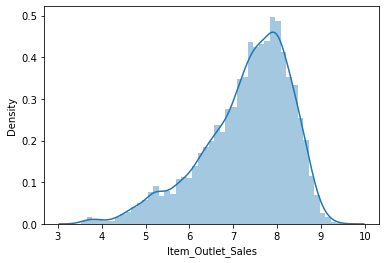

In [37]:
sns.distplot(data_train['Item_Outlet_Sales'])

now we can see the item outlets sales graph looks like normally distributed the skewness in the data have reduced now our entire data is normally distributed now we can go ahead and make our assumptions

In [38]:
#first lets seperate the features columns and label column
x=data_train.drop(columns=['Item_Outlet_Sales'],axis=1)
y=data_train['Item_Outlet_Sales']

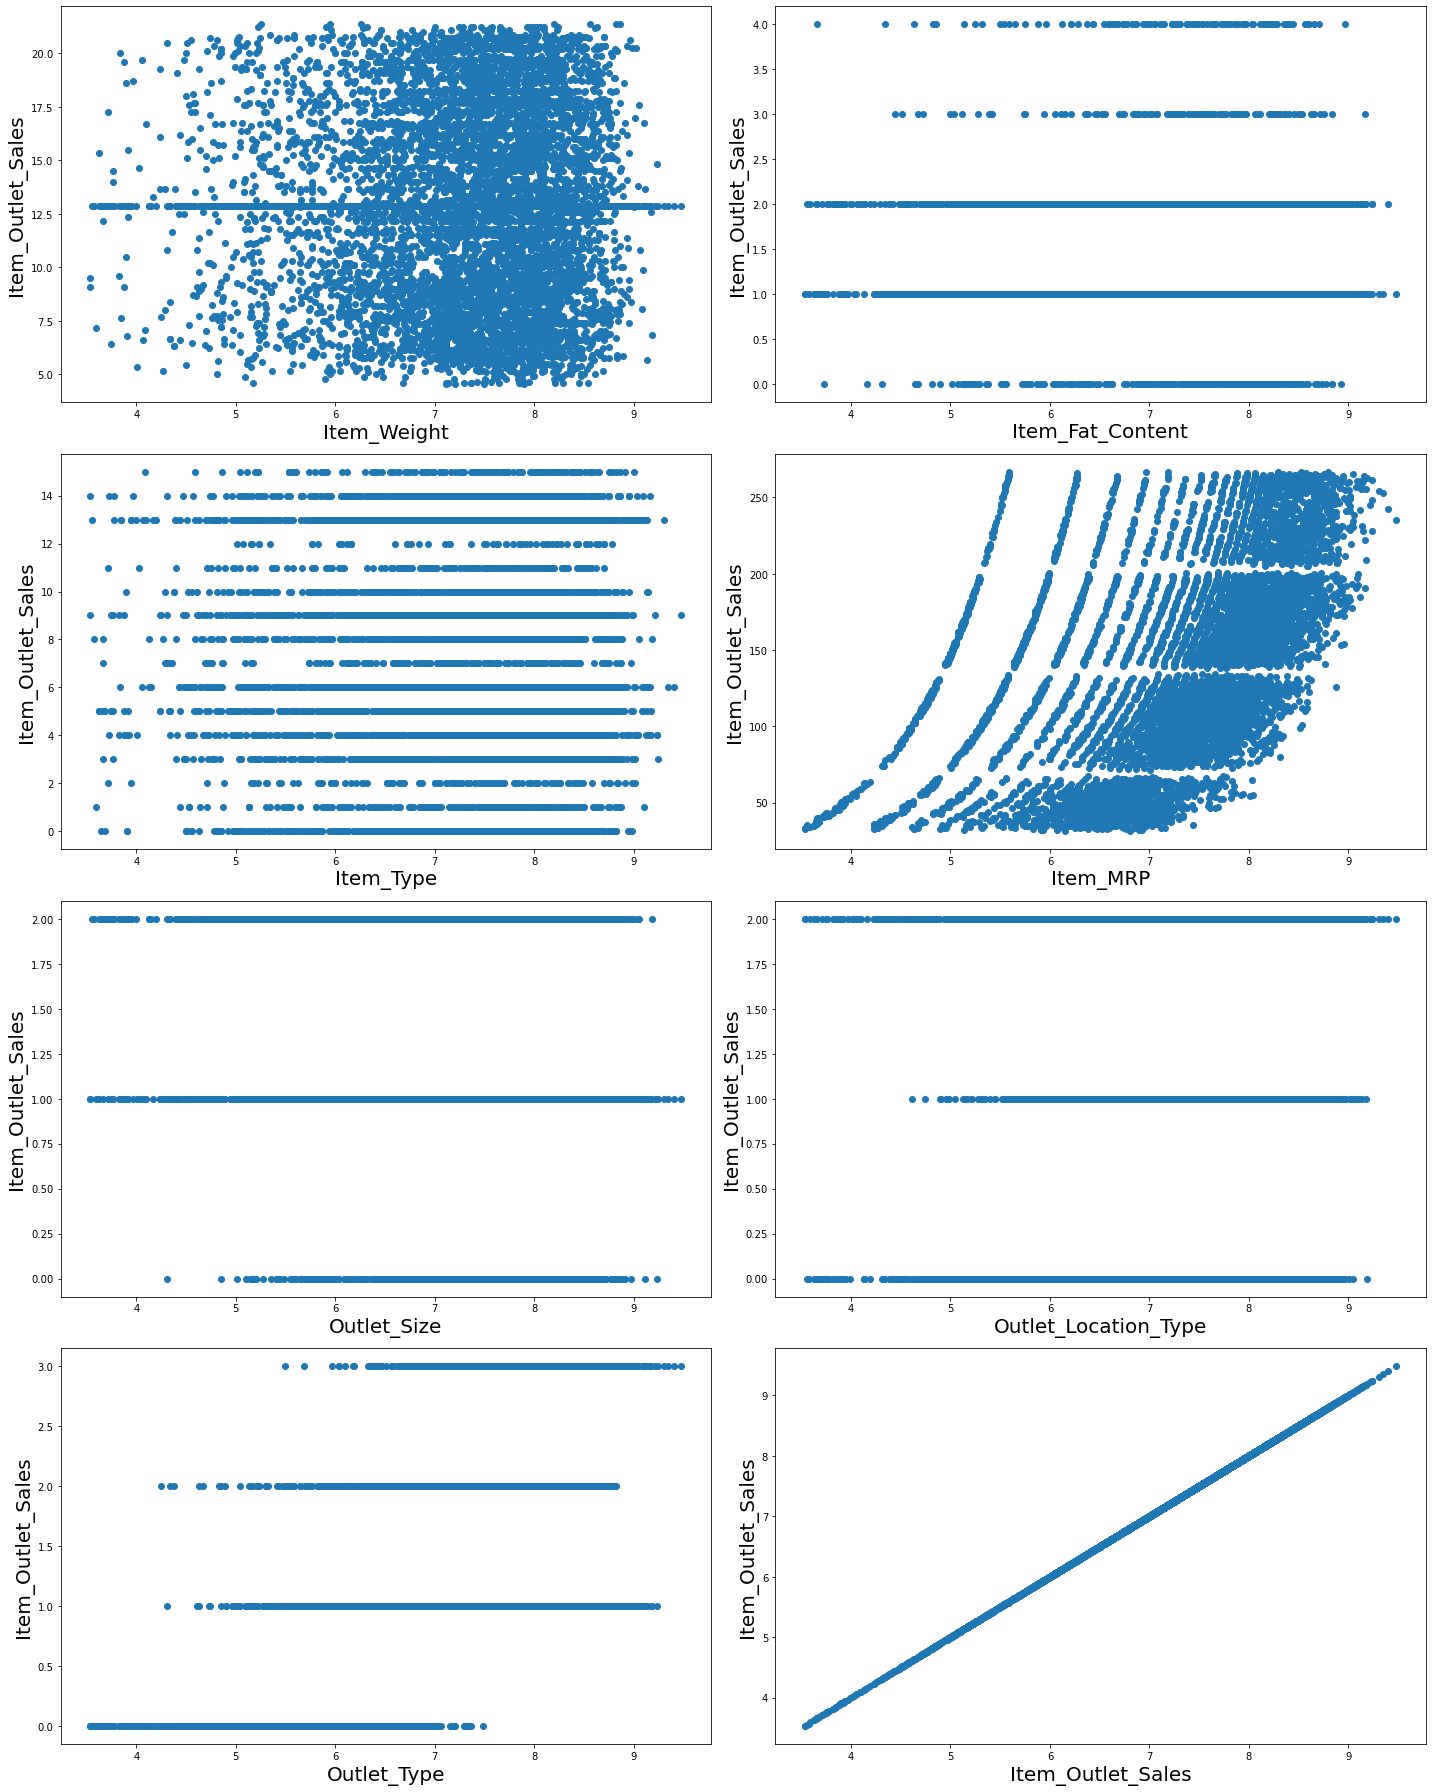

In [39]:
#lets plot the distribution plot to check the distribution of our data
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data_train:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        plt.scatter(y,data_train[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Item_Outlet_Sales',fontsize=20)
    plotnumber+=1
plt.tight_layout()


From the scatter plot we can compare our feature and label relation 

1.In the first graph of item weight and sales if the price range from 6 to 8 the sales are high that means they are corelated to each other based on the weight of the product the sales of the product depends.

2.When the item has high fat content is more the sales are very less of 1 to 2 which means that the sales and fat content are inversly proportion to each other when ever the product has less fat content then only the sales increases.

3.Based on the item type the sales increases, on the type of products 4 and 5 the sales are very less but after the type 5 the less got increased so mostly the customers are investing more on the products after the 5th type on the type 4 or type 5.

4.The item mrp and sales are directly proportions as the prouct MRP is more the sales are also increasing in the same manner so by this we can say both are corelated.In all the other products also the features and label are directly corelated.so each and every feature has their contribution on the outlet sales.

In [40]:
#scailing the age and fare column because of the continous data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
feature_scale=['Item_Weight','Item_MRP','Outlet_Years']
data_train[feature_scale]=scaler.fit_transform(data_train[feature_scale])
data_train.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,-0.841872,1,4,1.747454,1,0,1,8.225808,-0.139541
1,-1.641706,2,14,-1.489023,1,2,2,6.096776,-1.334103
2,1.098554,1,10,0.010040,1,0,1,7.648868,-0.139541
3,1.500838,2,6,0.660050,1,2,0,6.597664,-0.020085
4,-0.929428,1,9,-1.399220,0,2,1,6.903451,1.293934


In [41]:
#Lets handle with testing data

In [42]:
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [43]:
data_test.shape

(5681, 11)

In [44]:
data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [45]:
#filling the missing column using mean method
data_test['Item_Weight']=data_test['Item_Weight'].fillna(data_test['Item_Weight'].mean())

In [46]:
#filling the missing column with mode method 
data_test['Outlet_Size']=data_test['Outlet_Size'].fillna(data_test['Outlet_Size'].mode()[0])

In [47]:
data_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [48]:
#creating small values for the establishment of the year
data_test['Outlet_Years']=2013-data_test['Outlet_Establishment_Year']
data_test['Outlet_Years']

0       14
1        6
2       15
3        6
4       28
        ..
5676    16
5677     4
5678    11
5679     6
5680    11
Name: Outlet_Years, Length: 5681, dtype: int64

In [49]:
#Dropping the columns which dont contribute much for sales
data_test=data_test.drop(['Item_Identifier','Item_Visibility','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [50]:
#let me convert the string data to continous data using label encoder
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
item=lab_enc.fit_transform(data_test['Item_Type'])
item

array([13,  4, 11, ...,  8,  3,  3])

In [51]:
pd.Series(item)
data_test['Item_Type']=item

In [52]:
#let me convert the string data to continous data using label encoder
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
type=lab_enc.fit_transform(data_test['Outlet_Type'])
pd.Series(type)
data_test['Outlet_Type']=type

In [53]:
#let me convert the string data to continous data using label encoder
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
type=lab_enc.fit_transform(data_test['Outlet_Type'])
pd.Series(type)
data_test['Outlet_Type']=type

In [54]:
#let me convert the string data to continous data using label encoder
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
type=lab_enc.fit_transform(data_test['Outlet_Location_Type'])
pd.Series(type)
data_test['Outlet_Location_Type']=type

In [55]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
type=lab_enc.fit_transform(data_test['Outlet_Size'])
pd.Series(type)
data_test['Outlet_Size']=type

In [56]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
type=lab_enc.fit_transform(data_test['Item_Fat_Content'])
pd.Series(type)
data_test['Item_Fat_Content']=type

In [57]:
#scailing the age and fare column because of the continous data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
feature_scale=['Item_Weight','Item_MRP','Outlet_Years']
data_test[feature_scale]=scaler.fit_transform(data_test[feature_scale])

In [58]:
data_test.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,1.897460e+00,1,13,-0.536555,1,0,1,-0.139891
1,-1.035530e+00,4,4,-0.868937,1,1,1,-1.095512
2,4.486336e-01,1,11,1.629848,1,2,0,-0.020438
3,-1.267578e+00,1,13,0.226697,1,1,1,-1.095512
4,-5.230960e-14,2,4,1.508110,1,2,3,1.532446


In [59]:
data_train.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,-0.841872,1,4,1.747454,1,0,1,8.225808,-0.139541
1,-1.641706,2,14,-1.489023,1,2,2,6.096776,-1.334103
2,1.098554,1,10,0.010040,1,0,1,7.648868,-0.139541
3,1.500838,2,6,0.660050,1,2,0,6.597664,-0.020085
4,-0.929428,1,9,-1.399220,0,2,1,6.903451,1.293934


In [60]:
#first lets seperate the features columns and label column
x=data_train.drop(columns=['Item_Outlet_Sales'],axis=1)
y=data_train['Item_Outlet_Sales']

In [61]:
#importing some of the libraries to build our model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import metrics
import xgboost as xgb

### Linear Regression

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=250)
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### predicting for model evaluation

In [63]:
y_pred_test=lr.predict(x_test)

### Actual Prediction

In [64]:
y_pred=lr.predict(data_test)
y_pred

array([7.48367746, 7.01100593, 6.87924423, ..., 7.15641943, 8.09161946,
       6.83031597])

### Model evaluation

In [65]:
lr.score(x_test,y_test)

0.5745482047283981

In [66]:
#Finding cross val score
scr=cross_val_score(lr,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  57.94236492363108


### Error calculating

In [67]:
mean_squared_error(y_test,y_pred_test)

0.435524533631818

In [68]:
mean_absolute_error(y_test,y_pred_test)

0.5223308956000042

In [69]:
np.sqrt(mean_absolute_error(y_test,y_pred_test))

0.7227246333147945

### KNeighbors Regressor

In [70]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [71]:
y_pred_test=knn.predict(x_test)

In [72]:
y_pred=knn.predict(data_test)
y_pred

array([7.49827676, 7.89484181, 6.75448181, ..., 7.49769284, 8.16327529,
       7.34049207])

### Metric Evaluation

In [73]:
knn.score(x_test,y_test)*100

65.42526724475877

In [74]:
#Finding cross val score
scr=cross_val_score(knn,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  65.73481607168694


### Error calculation

In [75]:
mean_squared_error(y_test,y_pred_test)

0.35393303133339205

In [76]:
mean_absolute_error(y_test,y_pred_test)

0.460361085814657

In [77]:
np.sqrt(mean_absolute_error(y_test,y_pred_test))

0.6784991420883721

### Decision Tree Regressor

In [78]:
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [79]:
#Predicting for x_test
y_pred_test=DT.predict(x_test)

In [80]:
#predicting for data_test
y_pred=DT.predict(data_test)

### Metric evaluation

In [81]:
#score
DT.score(x_test,y_test)*100

43.6163439123437

In [82]:
#Finding cross val score
scr=cross_val_score(DT,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  44.499101573182


### Error calculation

In [83]:
mean_squared_error(y_test,y_pred_test)

0.5771856129166607

In [84]:
mean_absolute_error(y_test,y_pred_test)

0.5798683985645671

In [85]:
np.sqrt(mean_absolute_error(y_test,y_pred_test))

0.7614909051095535

### Random Forest Regressor

In [86]:
Rf=RandomForestRegressor()
Rf.fit(x_train,y_train)

RandomForestRegressor()

In [87]:
y_pred=Rf.predict(data_test)

### Metric evaluation

In [88]:
Rf.score(x_test,y_test)*100

68.5781793098905

In [89]:
#Finding cross val score
scr=cross_val_score(Rf,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  69.44920439466733


### Error Calculation

In [90]:
mean_squared_error(y_test,y_pred_test)

0.5771856129166607

In [91]:
mean_absolute_error(y_test,y_pred_test)

0.5798683985645671

In [92]:
np.sqrt(mean_absolute_error(y_test,y_pred_test))

0.7614909051095535

### Lasso Regressor

In [93]:
lp=Lasso()
lp.fit(x_train,y_train)

Lasso()

In [94]:
y_pred=lp.predict(data_test)

### Metric evaluation

In [95]:
lp.score(x_test,y_test)*100

-0.0687331309938255

In [96]:
#Finding cross val score
scr=cross_val_score(lp,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  -0.0670918559903777


### Error claculation

In [97]:
mean_squared_error(y_test,y_pred_test)

0.5771856129166607

In [98]:
mean_absolute_error(y_test,y_pred_test)

0.5798683985645671

In [99]:
np.sqrt(mean_absolute_error(y_test,y_pred_test))

0.7614909051095535

### Ridge Regressor

In [100]:
#Instantiating the model
rp=Ridge()
rp.fit(x_train,y_train)

Ridge()

In [101]:
#Predicting for test data
y_pred_test=rp.predict(x_test)

In [102]:
#predicting fot data_test
y_pred=rp.predict(data_test)

### Metric evaluation

In [103]:
#Fing the score
rp.score(x_test,y_test)

0.5745428543594486

In [104]:
#Finding cross val score
scr=cross_val_score(rp,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  57.94247924679177


### Error claculation

In [115]:

mean_squared_error(y_test,y_pred_test)

0.4355300106728537

In [116]:
mean_absolute_error(y_test,y_pred_test)

0.5223257848257888

In [117]:
np.sqrt(mean_absolute_error(y_test,y_pred_test))

0.7227210975374864

### Hyper parameter tuning

In [118]:
#Hyper Parameter Tuning using GridSearchCV
params={"n_estimators":[10,20,30],"max_features":["auto", "sqrt", "log2"],"min_samples_split":[2,4,8],"bootstrap":[True, False]}
grid = GridSearchCV(Rf,param_grid=params)
grid.fit(x_train,y_train)
grid.best_params_

{'bootstrap': True,
 'max_features': 'log2',
 'min_samples_split': 8,
 'n_estimators': 30}

### Random Forest Tuning

In [119]:
Rf=RandomForestRegressor(bootstrap=True,max_features='log2',min_samples_split=8,min_samples_leaf=2,n_estimators=30)
Rf.fit(x_train,y_train)
y_pred=Rf.predict(data_test)

In [120]:
Rf.score(x_test,y_test)*100

71.23202902111875

In [121]:
#Finding cross val score
scr=cross_val_score(Rf,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  71.77907152523368


In [122]:
mean_squared_error(y_test,y_pred_test)

0.4355300106728537

In [123]:
mean_absolute_error(y_test,y_pred_test)

0.5223257848257888

In [124]:
np.sqrt(mean_absolute_error(y_test,y_pred_test))

0.7227210975374864

Seems to be our score got improved by using hyper parameter tuning.So,our best fit model for this model is Random forest Regression

### Model saving

In [125]:
#Saving the model
import pickle
filename='Big Data sales prediction.pkl'
pickle.dump(Rf,open(filename,'wb'))